### N维数组

机器学习用的最多的是N维数组，N维数组是机器学习和神经网络的主要数据结构。

<div align="center">
    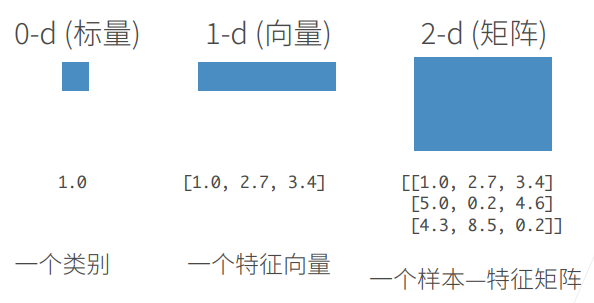
</div>

### 创建数组

创建数组需要：形状、数据类型、元素值。

<div align="center">
	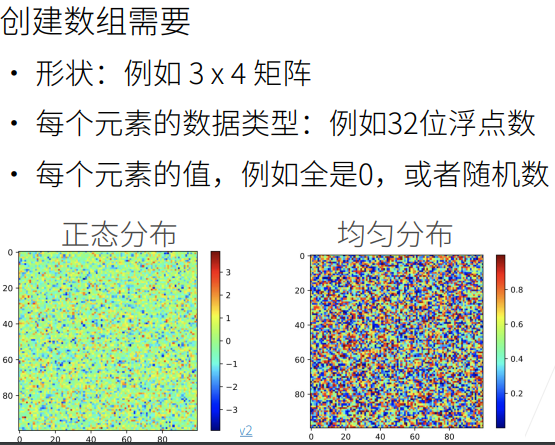
</div>

### 访问元素

1)可以根据切片，或者间隔步长访问元素。

2)[::3,::2]是每隔3行、2列访问。

<div align="center">
	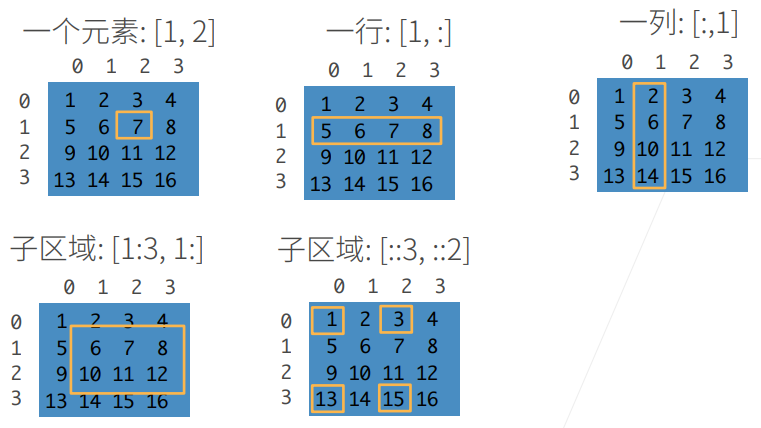
</div>

### 数据操作

虽然库为PyTorch库，但应该导入torch，而不是pytorch。

In [1]:
import torch
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

可以通过张量的shape属性来访问张量的形状和张量中元素的总数。

In [2]:
x.shape
x.numel()

12

要改变一个张量的形状而不改变元素数量和元素值，可以调用reshape函数。

In [3]:
x = x.reshape(3,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

使用全0、全1、其他常量或者从特定分布中随即采样的数字。

In [4]:
 torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [5]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

通过提供包含数值的Python列表（或嵌套列表）来为所需张量中的每个元素赋予确定值。

In [11]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [12]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]]).shape

torch.Size([3, 4])

In [13]:
torch.tensor([[[2,1,4,3],[1,2,3,4],[4,3,2,1]]])

tensor([[[2, 1, 4, 3],
         [1, 2, 3, 4],
         [4, 3, 2, 1]]])

In [14]:
torch.tensor([[[2,1,4,3],[1,2,3,4],[4,3,2,1]]]).shape

torch.Size([1, 3, 4])

常见的标准算术运算符(+、-、*、/、和 **)都可以被升级为按元素运算。

In [15]:
x =torch.tensor([1.0,2,4,8])
y =torch.tensor([2,2,2,2])
x + y, x - y, x * y, x / y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

可以把多个张量结合在一起。

In [16]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [17]:
Z = torch.zeros((3,4))
torch.cat((X,Y,Z),dim=2)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [18]:
X = X.unsqueeze(2)
Y = Y.unsqueeze(2)
Z = Z.unsqueeze(2)
torch.cat((X,Y,Z),dim=2)

tensor([[[ 0.,  2.,  0.],
         [ 1.,  1.,  0.],
         [ 2.,  4.,  0.],
         [ 3.,  3.,  0.]],

        [[ 4.,  1.,  0.],
         [ 5.,  2.,  0.],
         [ 6.,  3.,  0.],
         [ 7.,  4.,  0.]],

        [[ 8.,  4.,  0.],
         [ 9.,  3.,  0.],
         [10.,  2.,  0.],
         [11.,  1.,  0.]]])

In [19]:
torch.cat((X,Y,Z),dim=3)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

通过逻辑运算符构建二元张量。

In [24]:
X,Y

(tensor([[[ 0.],
          [ 1.],
          [ 2.],
          [ 3.]],
 
         [[ 4.],
          [ 5.],
          [ 6.],
          [ 7.]],
 
         [[ 8.],
          [ 9.],
          [10.],
          [11.]]]),
 tensor([[[2],
          [1],
          [4],
          [3]],
 
         [[1],
          [2],
          [3],
          [4]],
 
         [[4],
          [3],
          [2],
          [1]]]))

In [25]:
X == Y

tensor([[[False],
         [ True],
         [False],
         [ True]],

        [[False],
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         [False]]])

对张量中所有元素进行求和会产生一个只有一个元素的张量。

In [26]:
X.sum()

tensor(66.)

即使形状不同，仍然可以通过调用广播机制(broadcasting mechanism) 来执行按元素操作。

In [27]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [28]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

上面为什么形状不同可以相加呢，因为广播机制（broadcasting mechanism）会将他们通过复制变成一样的形状，a通过复制加一列变成3×2矩阵，b通过复制加两行也变成3×2矩阵

可以用[-1]选择最后一个元素，可以用[1:3]选择第二个和第三个元素。

In [29]:
X[-1],X[1:3]

(tensor([[ 8.],
         [ 9.],
         [10.],
         [11.]]),
 tensor([[[ 4.],
          [ 5.],
          [ 6.],
          [ 7.]],
 
         [[ 8.],
          [ 9.],
          [10.],
          [11.]]]))

In [33]:
X = torch.arange(12).reshape((3,4))
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

除读取外，还可以通过指定索引来将元素写入矩阵。

In [34]:
X[1,2]=9
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

为多个元素赋值相同的值，只需要索引所有元素，然后为它们赋值。

In [35]:
X[0:2,:] = 12
X

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

In [45]:
Y = torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
Y

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

重复使用一个值可能会导致内存不足 就需使用下面的操作 可以看到操作一是会额外分配内存给Y的 用操作二定义一个Z，zeros_like使Z与Y的shape与数据类型相同但元素全是0

In [46]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [48]:
Z = torch.zeros_like(Y)
print('id(Z):',id(Z))
Z[:] = X + Y
print('id(Z):',id(Z))

id(Z): 2486782344944
id(Z): 2486782344944


若无重复使用元素，也可以使用X[:] = X + Y或X += Y来减少操作的内存开销

In [49]:
before = id(X)
X += Y
id(X) == before

True

张量转NumPy。

In [50]:
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

将大小为1的张量转为Python标量。

In [51]:
a=torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 数据预处理

In [1]:
!pip install pandas

创建一个人工数据集，并存储在csv(逗号分隔符)文件。

In [5]:
import os

os.makedirs(os.path.join('data'),exist_ok=True) # 相对路径，创建文件夹
data_file = os.path.join('data','house_tiny.csv')
print(data_file)
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

data\house_tiny.csv


从创建的csv文件中加载原始数据集。

In [6]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


为了处理缺失的数据，典型的方法包括插值和删除，这里考虑插值。

In [7]:
inputs, outputs = data.iloc[:,0:2],data.iloc[:,2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


对于inputs中的类别值或离散值，将“NaN”视为一个类别。

In [8]:
inputs = pd.get_dummies(inputs,dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式。

In [9]:
import torch

x,y = torch.tensor(inputs.values),torch.tensor(outputs.values)
x,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### 特征值、特征向量求解

下图为对矩阵求特征值、求特征向量的相关操作。

<div align="center">
	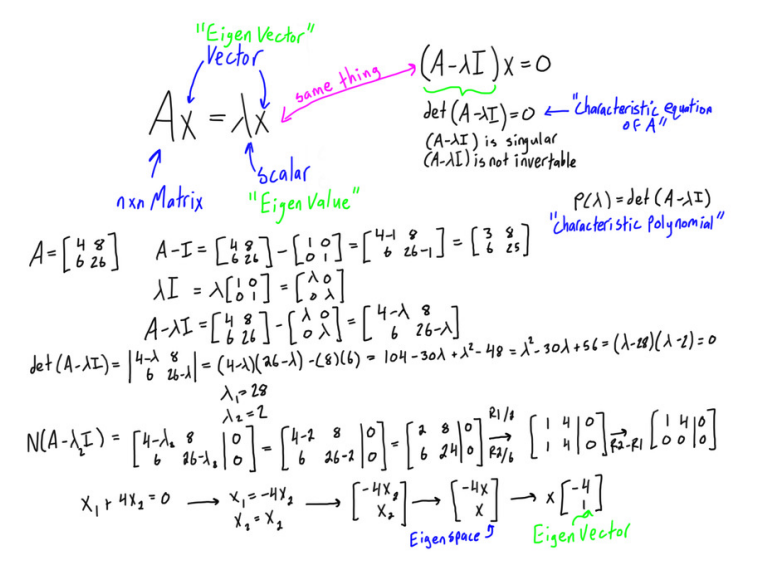
</div>

### 标量运算

<div align="center">
	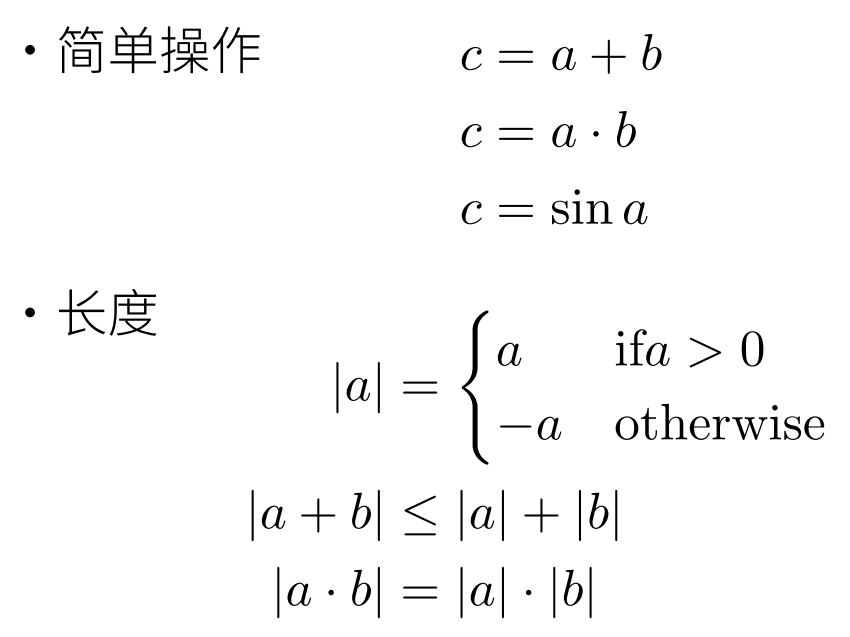
</div>

### 向量运算

下图中，α是一个标量，<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>c</mi>
  <mo>=</mo>
  <mi>&#x3B1;</mi>
  <mi>b</mi>
</math>是把向量b拉长。

<div align="center">
	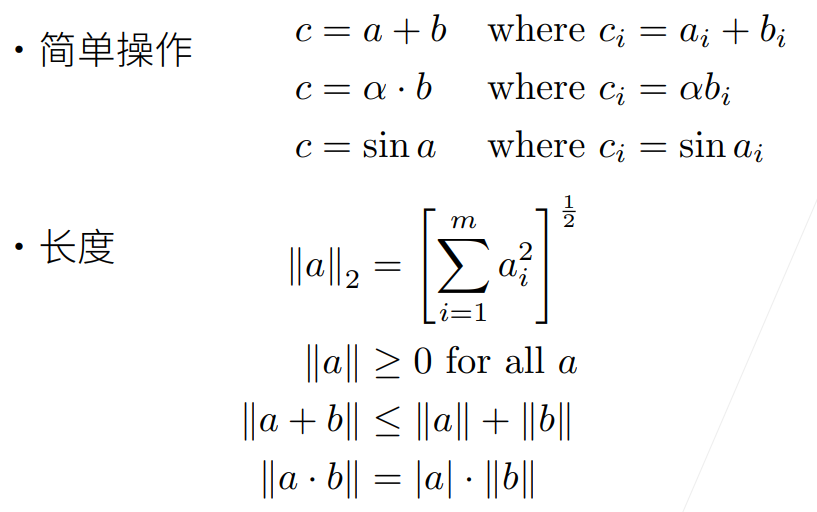
    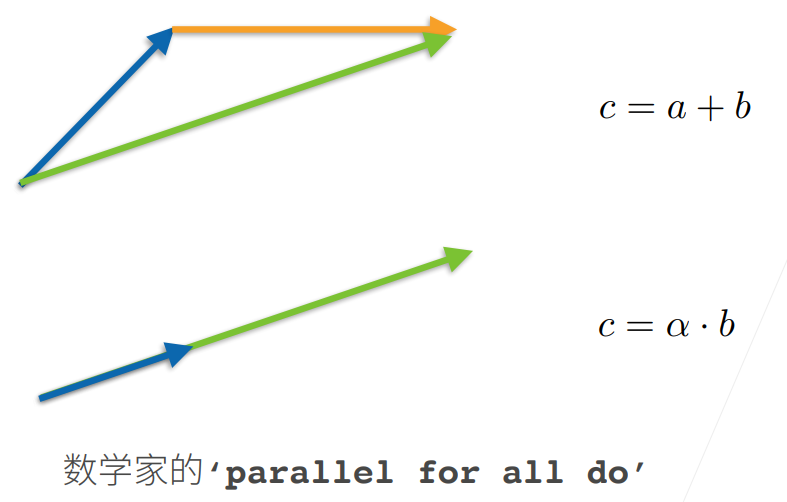
    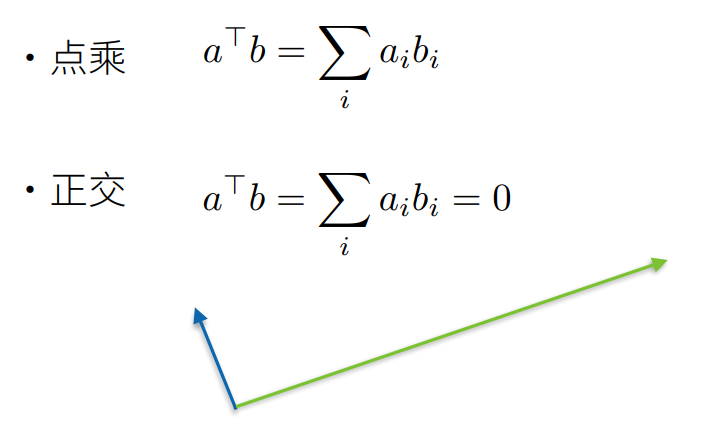
</div>

### 矩阵运算

<div align="center">
	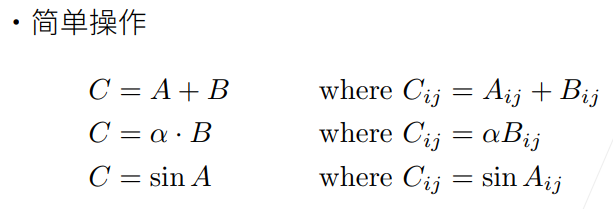
    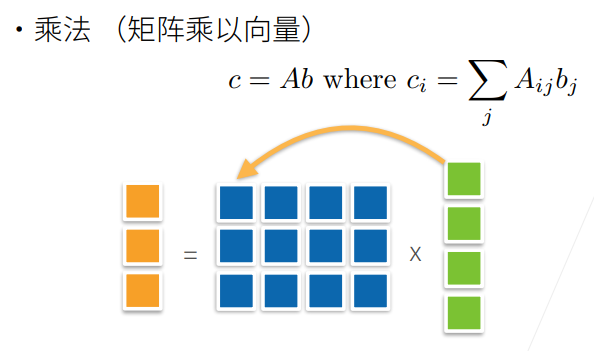
    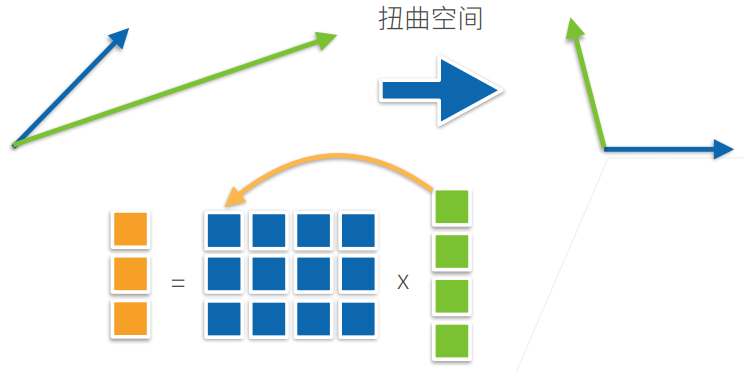
    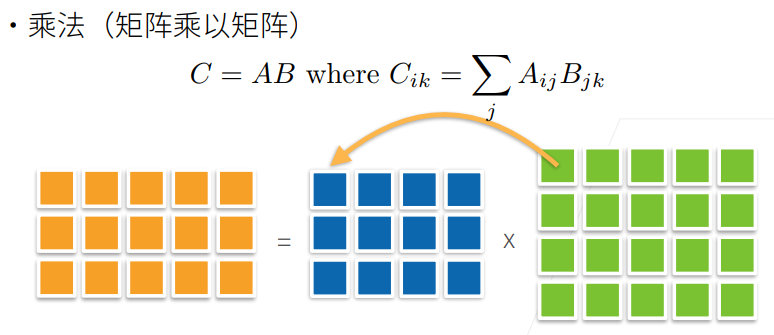
</div>

矩阵长度叫范数，下图为矩阵范数满足的公式。

<div align="center">
	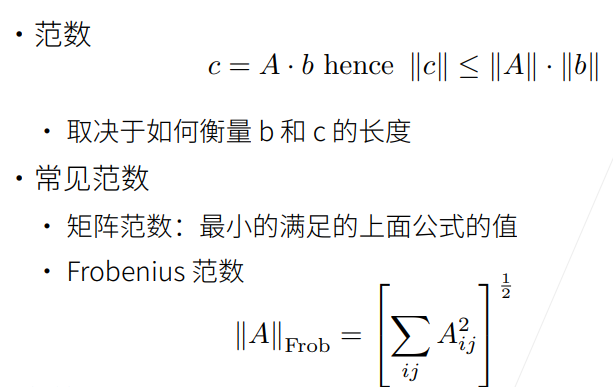
    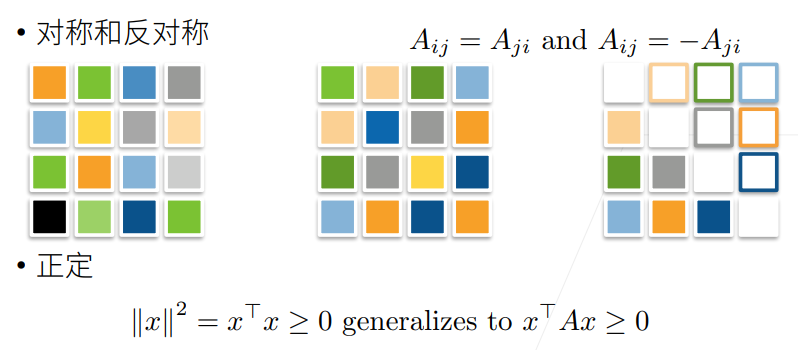
    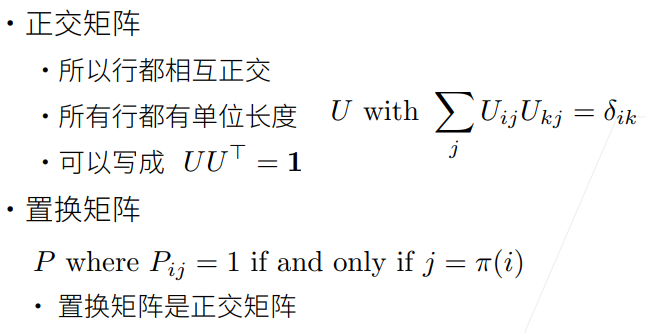
</div>

### 特征向量、特征值

红色、绿色向量都被一个矩阵作用后，红色的大小和方向都被改变了，绿色的仅被改变了大小，没有改变方向。绿色向量为矩阵的特征向量。

<div align="center">
    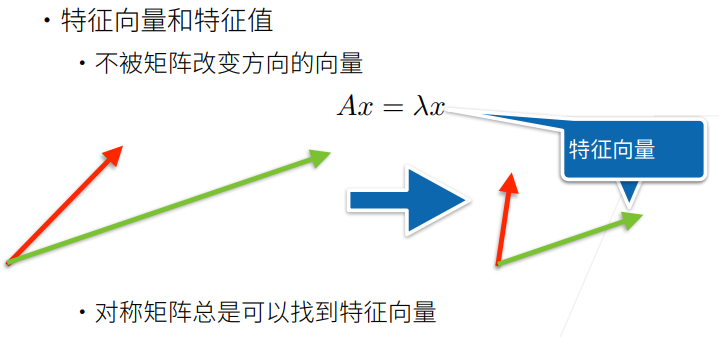
</div>

### 线性代数

标量由只有一个元素的张量表示。

In [1]:
import torch

x = torch.tensor([3.0])
y = torch.tensor([2.0])

x + y,x * y, x / y,x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

可以将向量视为标量值组成的列表。

In [2]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

通过张量的索引来访问任一元素。

In [3]:
x[3]

tensor(3)

访问张量的长度。

In [4]:
len(x)

4

只有一个轴的张量，形状只有一个元素。

In [5]:
x.shape

torch.Size([4])

通过指定两个分量m和n来创建一个形状为m×n的矩阵。

In [6]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

矩阵的转置。

In [7]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

对称矩阵（symmetric matrix）A等于其转置：<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>A</mi>
  <mo>=</mo>
  <msup>
    <mi>A</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>T</mi>
    </mrow>
  </msup>
</math>

In [8]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [9]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

就像向量是标量的推广，矩阵是向量的推广一样，可以构建更多轴的数据结构。

In [10]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

给定具有相同形状的任何两个张量，任何按元素二元运算的结果都将是相同形状的张量。

In [11]:
A=torch.arange(20,dtype=torch.float32).reshape(5,4)
B=A.clone()  # 通过分配新内存，将A的一个副本分配给B
A,A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个同型矩阵按元素的逐元素乘法称为哈达玛积（Hadamard product），数学符号为⊙

In [12]:
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [13]:
a=2
X=torch.arange(24).reshape(2,3,4)
a+X,(a*X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

计算所有元素的和。

In [15]:
x=torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

表示任意形状张量的元素和。

In [2]:
import torch
A=torch.arange(20*2).reshape(2,5,4)
A,A.shape,A.sum()

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [12, 13, 14, 15],
          [16, 17, 18, 19]],
 
         [[20, 21, 22, 23],
          [24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35],
          [36, 37, 38, 39]]]),
 torch.Size([2, 5, 4]),
 tensor(780))

指定张量沿哪一个轴来通过求和降低维度。

In [3]:
A_sum_axis0=A.sum(axis=0)
A_sum_axis0,A_sum_axis0.shape

(tensor([[20, 22, 24, 26],
         [28, 30, 32, 34],
         [36, 38, 40, 42],
         [44, 46, 48, 50],
         [52, 54, 56, 58]]),
 torch.Size([5, 4]))

In [4]:
A_sum_axis1=A.sum(axis=1)
A_sum_axis1,A_sum_axis1.shape

(tensor([[ 40,  45,  50,  55],
         [140, 145, 150, 155]]),
 torch.Size([2, 4]))

对于三维张量 (a, b, c)：

axis=0: 沿第一个维度 a 求和（深度方向），结果形状为 (b, c)
axis=1: 沿第二个维度 b 求和（行方向），结果形状为 (a, c)
axis=2: 沿第三个维度 c 求和（列方向），结果形状为 (a, b)

In [5]:
A.sum(axis=[0,1]) # Same as 'A.sum()'

tensor([180, 190, 200, 210])

一个与求和相关的量是平均值（mean或average）。

In [2]:
import torch
A=torch.arange(20,dtype=torch.float32).reshape(5,4)
A,A.mean(),A.sum()/A.numel()

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor(9.5000),
 tensor(9.5000))

In [26]:
A.mean(axis=0),A.sum(axis=0)/A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

keepdims=True会使所求维度不消失，变成1维

In [7]:
sum_A=A.sum(axis=1,keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

通过广播将A除以sum_A。

In [8]:
A/sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [11]:
A.sum(axis=0)


tensor([40., 45., 50., 55.])

某个轴计算A元素的累加总和。

In [12]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

点积是相同位置的按元素成绩的和。

In [16]:
x=torch.arange(4,dtype=torch.float32)
y=torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

可以通过执行按元素乘法，然后进行求和来表示两个向量的点积。

In [17]:
torch.sum(x*y)

tensor(6.)

矩阵matrix，向量vector，范数norm

A是一个m×n的矩阵，x是一个n×1的矩阵，矩阵向量积$Ax$是一个长度为m的列向量，其第i个元素是点积$a_i^Tx$

In [18]:
A.shape,x.shape,torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

可以将矩阵-矩阵乘法AB看作是简单地执行m次矩阵-向量积，并将结果拼接在一起，形成一个n×m矩阵。

In [19]:
B=torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

L2范数是向量元素平方和的平方根：$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}$

In [22]:
u=torch.tensor([3.0,-4.0])
torch.norm(u) #向量2范数

tensor(5.)

$L_{1}$范数，它表示为向量元素的绝对值之和：$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|$

In [23]:
torch.abs(u).sum() #向量1范数

tensor(7.)

矩阵的弗罗贝尼乌斯范数（Frobenius norm）是矩阵元素的平方和的平方根：$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}$$

In [24]:
torch.norm(torch.ones(4,9)) #矩阵F范数

tensor(6.)

### 向量链式法则

<div align="center">
	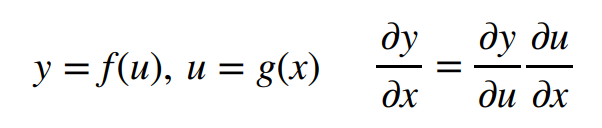
</div>

需要注意维数的变化

下图三种情况分别对应：

    i.y为标量，x为向量
    ii.y为标量，x为矩阵
    iii.y、x为矩阵

<div align="center">
	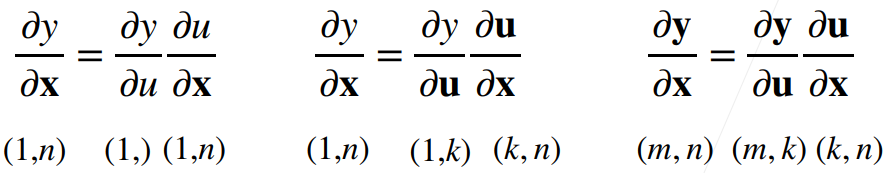
</div>

由于在神经网络动辄几百层，手动进行链式求导是很困难的，因此我们需要借助自动求导

### 自动求导

含义：计算一个函数在指定值上的导数

自动求导有别于

符号求导
    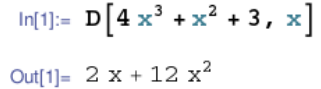

数值求导
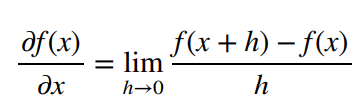

### 计算图

* 将代码分解成操作子

* 将计算表示成一个无环图

    下图自底向上其实就类似于链式求导过程

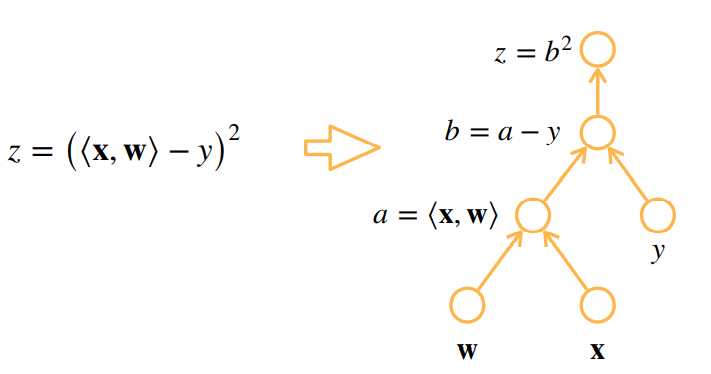

* 计算图有两种构造方式

    显示构造
        可以理解为先定义公式再代值
        Tensorflow/Theano/MXNet

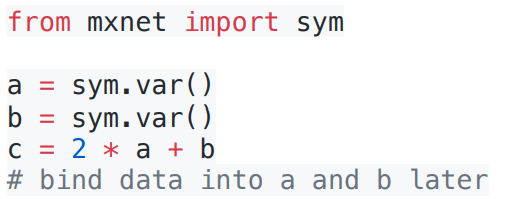

    隐式构造
        系统将所有的计算记录下来
        Pytorch/MXNet

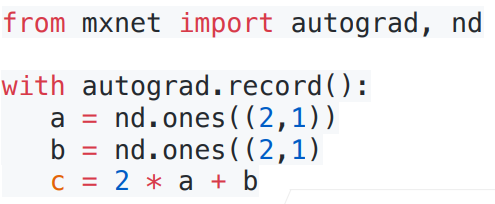

自动求导的两种模式

* 正向累积

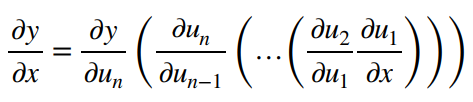

* 反向累积（反向传递back propagation）

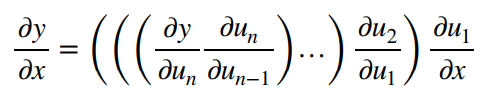

反向累积计算过程

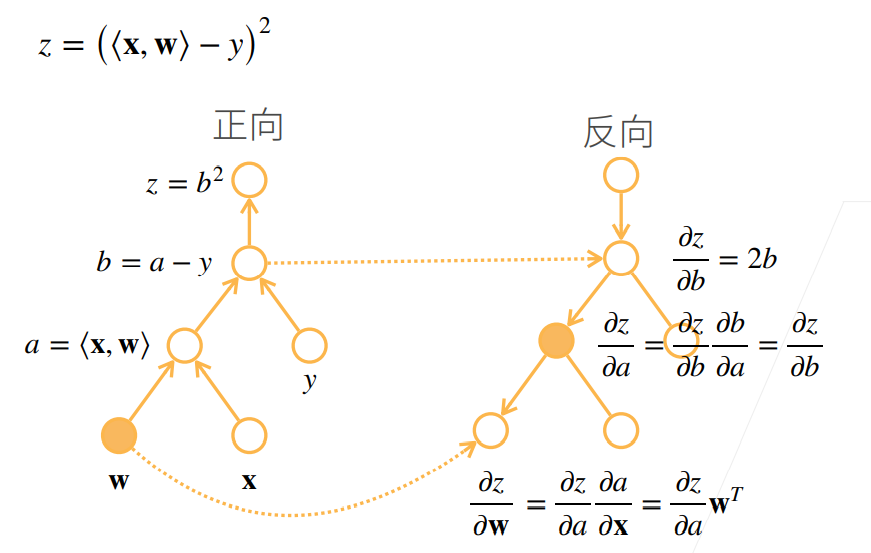

    反向累积的正向过程：自底向上，需要存储中间结果
    反向累积的反向过程：自顶向下，可以去除不需要的枝（图中的x应为w）

复杂度比较

* 反向累积
    * 时间复杂度：O(n),n是操作子数
        * 通常正向和反向的代价类似
    * 空间复杂度：O(n)
        * 存储正向过程所有的中间结果

* 正向累积
>每次计算一个变量的梯度时都需要将所有节点扫一遍

    * 时间复杂度：O(n)
    * 空间复杂度：O(1)

对y = x.Tx关于列向量x求导

In [1]:
import torch
x=torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True) # 等价于 'x=torch.arange(4.0,requires_grad=True)'
x.grad # 默认值是None

x.requires_grad_(True)将张量x标记为需要计算梯度

x.grad用于访问x的梯度

PyTorch隐式地构造计算图，grad_fn用于记录梯度计算

In [3]:
y=2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
# 当执行y.backward()时，PyTorch会自动计算y关于所有requires_grad=True的张量的梯度，并将梯度累积到这些张量的.grad属性中
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4*x

tensor([True, True, True, True])

In [7]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y=x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [8]:
# 对非标量调用'backward'需要传入一个'gradient'参数
x.grad.zero_()
y=x*x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

将某些计算移动到记录的计算图之外

In [9]:
x.grad.zero_()
y=x*x
u=y.detach()
# y.detach()是将y当作一个常数，而不是一个关于x的函数
z=u*x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [10]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

即使构建函数的计算图需要用过Python控制流，仍然可以计算得到的变量的梯度

这也是隐式构造的优势，因为它会存储梯度计算的计算图，再次计算时执行反向过程就可以

In [11]:
def f(a):
    b=a*2
    while b.norm()<1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

a=torch.randn(size=(),requires_grad=True)
d=f(a)
d.backward()

a.grad == d/a

tensor(True)